In [24]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')
flatui = ["#8B0ABE", "#4989F5", "#FE2665", "#F28201", "#F28201", "#FFB624", "#e74c3c", "#34495e"]
sns.set_palette(flatui)

In [14]:
data = pd.read_csv('container-ports-2000-2017.csv')
data.head(5)

,U.S. Custom Ports,Coast,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Aberdeen, WA",P,0,0,0,0,0,8,0,0,0,29,0,16,414,645,855,43,505,383
1,"Anacortes, WA",P,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0
2,"Anchorage, AK",AK,0,0,0,"3,135","28,495","4,949","1,185",824,663,"1,208",540,"2,302","5,471","13,274","6,792","11,646","15,823","18,779"
3,"Baltimore, MD",A,"1,899,689","1,942,158","2,189,129","2,077,996","2,641,888","2,640,988","2,824,549","2,756,330","2,855,096","2,380,630","2,929,029","3,108,746","3,243,542","3,438,606","3,691,480","3,977,777","4,264,068","4,871,362"
4,"Baton Rouge, LA",G,8,0,959,21,3,149,"1,562",0,0,"1,164","6,456","2,587",12,"1,987",72,0,27,0


# Extract state data

In [15]:
data['state'] = data['U.S. Custom Ports'].apply(lambda x: x.split(',')[1])
data['U.S. Custom Ports'] = data['U.S. Custom Ports'].apply(lambda x: x.split(',')[0])

<AxesSubplot:xlabel='Year', ylabel='Containers'>

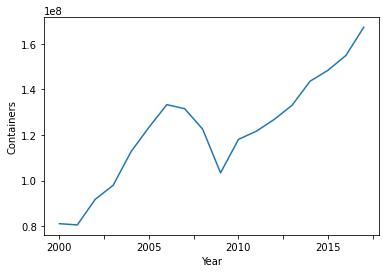

In [16]:
data_int = data.astype(str).applymap(lambda x: x.replace(',', '')).iloc[:, 2:-1].astype(int)
data_int.sum(axis=0).plot(xlabel='Year', ylabel='Containers')


In [18]:
data = data.melt(id_vars=['U.S. Custom Ports', 'state', 'Coast'], value_name='Containers', var_name='Year')

In [19]:
data['Containers'] = data['Containers'].astype(str).apply(lambda x: x.replace(',', '')).astype(int)

In [20]:
data

,U.S. Custom Ports,state,Coast,Year,Containers
0,Aberdeen,WA,P,2000,0
1,Anacortes,WA,P,2000,0
2,Anchorage,AK,AK,2000,0
3,Baltimore,MD,A,2000,1899689
4,Baton Rouge,LA,G,2000,8
...,...,...,...,...,...
1129,Tampa,FL,G,2017,437302
1130,Vancouver,WA,P,2017,7416
1131,West Palm Beach,FL,A,2017,367329
1132,Wilmington,DE,A,2017,1738055


In [22]:
df_to_plot = data.groupby(['Coast', 'Year']).sum()

<AxesSubplot:xlabel='Year', ylabel='Containers'>

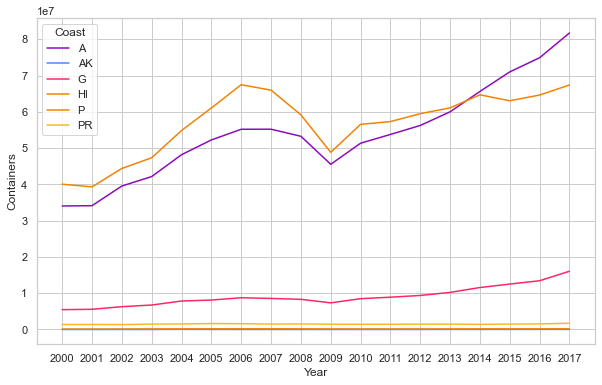

In [25]:
sns.lineplot(data=df_to_plot, x='Year', y='Containers', hue='Coast')